In [11]:
import cv2
import numpy as np
import pytesseract

# Step 1: Convert to binary image
image = cv2.imread('master_image_cross.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY_INV)

# Step 2: Preprocessing
binary_image = cv2.GaussianBlur(binary_image, (5, 5), 0)
binary_image = cv2.dilate(binary_image, None, iterations=2)
binary_image = cv2.erode(binary_image, None, iterations=2)

# Step 3: Blob Detection
num_labels, labels_im = cv2.connectedComponents(binary_image)

# Step 4: Cross Detection using OCR
for label in range(1, num_labels):
    mask = np.zeros(binary_image.shape, dtype=np.uint8)
    mask[labels_im == label] = 255

    # Use Tesseract to detect 'X'
    custom_config = r'--oem 3 --psm 10 -c tessedit_char_whitelist=X'
    text = pytesseract.image_to_string(mask, config=custom_config)
    
    if 'X' in text:
        # Save or mark the detected cross positions
        print(f"Detected cross at label: {label}")

# Step 5: Create Mask from Answer Key
# (similar to your existing method, adapted for crosses)

# Step 6: Apply Mask to Student Answers
# (similar to your existing method, adapted for crosses)


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

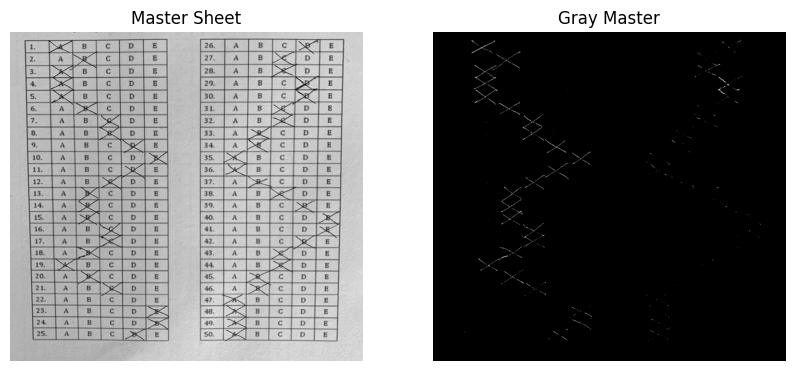

In [9]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Master Sheet')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Gray Master')
plt.axis('off')

plt.show()

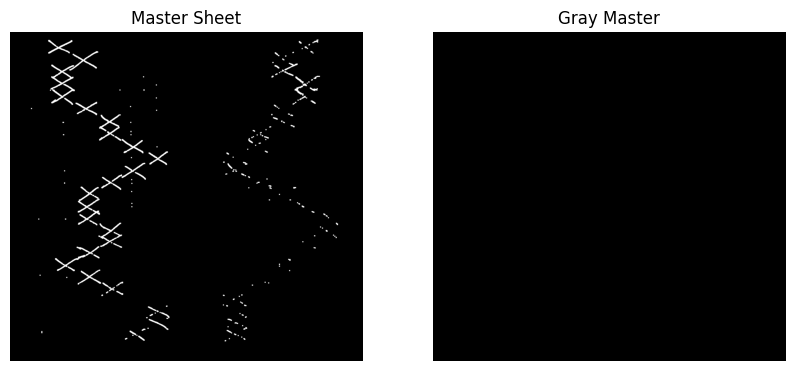

In [10]:
dilate_image = cv2.dilate(binary_image, None, iterations=2)
erode_image = cv2.erode(binary_image, None, iterations=2)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dilate_image, cmap='gray')
plt.title('Master Sheet')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erode_image, cmap='gray')
plt.title('Gray Master')
plt.axis('off')

plt.show()

In [8]:
import matplotlib.pyplot as plt

# ori_img = cv2.imread('master_image_cross.jpg')
# gray_ori = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)

# plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(ori_img, cmap='gray')
# plt.title('Master Sheet')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(gray_ori, cmap='gray')
# plt.title('Gray Master')
# plt.axis('off')

# plt.show()